<a href="https://colab.research.google.com/github/sohyeon98720/deepLearning_study/blob/master/study_1/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 버전 설치
!pip install -q tensorflow-gpu==2.0.0-rc1

In [0]:
# 필요한 모델 임포트
from keras import datasets
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using TensorFlow backend.


In [0]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

5


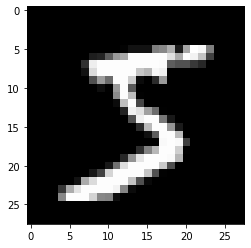

In [0]:
# 데이터 확인
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [0]:
# 데이터 확인 2
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
# 픽셀의 범위가 0~255까지 이므로 이미지처리를 쉽게 하기위해 255로 나눔 = 데이터 표준화
# + 255가 아닌 255.0으로 하여 강제형변환을 수행.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
# 데이터 전처리가 잘 됐는지 확인
x_train[0,0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# 정수의 분포 형태 보기
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [0]:
# 정답배열이 일반 정수형태이면 안되므로
# 원 핫 인코딩 수행
y_train_encoded=keras.utils.to_categorical(y_train)
y_test_encoded=keras.utils.to_categorical(y_test)

In [0]:
# 원 핫 인코딩이 잘 되었는지 확인
print(y_train[0],y_train_encoded[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# 데이터의 차원변경(28*28을 1차원으로)
x_train=x_train.reshape(-1,784)

In [0]:
# 데이터의 차원 확인하기
print(x_train.shape)

(60000, 784)


In [0]:
# 다중분류 모델 생성
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [0]:
model=Sequential()
model.add(Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
# 반환값을 history라는 변수에 저장
history=model.fit(x_train,y_train_encoded,epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 86us/sample - loss: 1.4554 - accuracy: 0.7062
Epoch 2/40
60000/60000 [==============================] - 5s 80us/sample - loss: 0.7180 - accuracy: 0.8482
Epoch 3/40
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5322 - accuracy: 0.8724
Epoch 4/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4537 - accuracy: 0.8839
Epoch 5/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4102 - accuracy: 0.8906
Epoch 6/40
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3821 - accuracy: 0.8952
Epoch 7/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3621 - accuracy: 0.8992
Epoch 8/40
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3469 - accuracy: 0.9028
Epoch 9/40
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3347 - accuracy: 0.9060
Epoch 10/40
60

In [0]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [0]:
# train set의 최종 손실과 정확도
print(history.history['loss'][-1])
print(history.history['accuracy'][-1])

0.20586801352699596
0.94138336


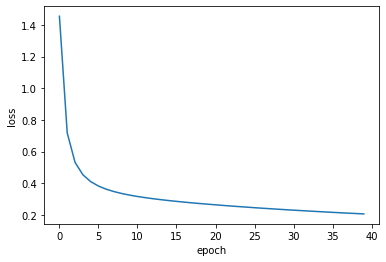

In [0]:
# 손실 그래프
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

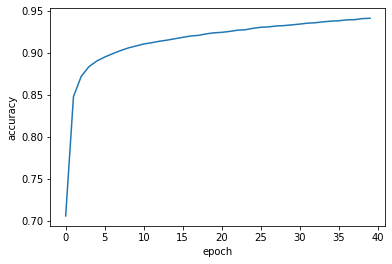

In [0]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
x_test=x_test.reshape(-1,784)

loss,accuracy=model.evaluate(x_test,y_test_encoded,verbose=0)
print(accuracy)

0.9421
